In [1]:
import tensorflow
import keras
ym = 'model_data/yolo.h5'

/home/bpse/anaconda3/envs/keras35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.models import load_model

#model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model(ym)

/home/bpse/anaconda3/envs/keras35/lib/python3.5/site-packages/keras/engine/saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
zero_paddi

In [4]:
import numpy as np

In [25]:
timg = np.random.rand(1,256,256,3)
timg = np.random.rand(1,416,416,3)
help(model)

Help on Model in module keras.engine.training object:

class Model(keras.engine.network.Network)
 |  The `Model` class adds training & evaluation routines to a `Network`.
 |  
 |  Method resolution order:
 |      Model
 |      keras.engine.network.Network
 |      keras.engine.base_layer.Layer
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  compile(self, optimizer, loss=None, metrics=None, loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None, **kwargs)
 |      Configures the model for training.
 |      
 |      # Arguments
 |          optimizer: String (name of optimizer) or optimizer instance.
 |              See [optimizers](/optimizers).
 |          loss: String (name of objective function) or objective function.
 |              See [losses](/losses).
 |              If the model has multiple outputs, you can use a different loss
 |              on each output by passing a dictionary or a list of losses.
 |              The loss value

model.predict(timg

In [28]:
output = model.predict(timg)


In [29]:
print(len(output))
for _ in range(len(output)):
    print(output[_].shape)


3
(1, 13, 13, 255)
(1, 26, 26, 255)
(1, 52, 52, 255)


In [32]:
from keras.models import Model
for cx in ['59','67','75']:
    layer_name='conv2d_'+cx
    intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
    lo = intermediate_layer_model.predict(timg)
    print(lo.shape)

(1, 13, 13, 255)
(1, 26, 26, 255)
(1, 52, 52, 255)


In [38]:
def output_from_model(imodel,layer_name):
    intermediate_layer_model = Model(inputs=imodel.input,
                                 outputs=imodel.get_layer(layer_name).output)
    output = intermediate_layer_model.predict(timg)
    if type(output)==list:
        print("Returning list")
        return output[:]
    elif type(output)==np.ndarray:
        print("Returning numpy array")
        return output.copy()


ox = output_from_model(imodel=model,layer_name='conv2d_74')
ox.shape

Returning numpy array


(1, 52, 52, 256)

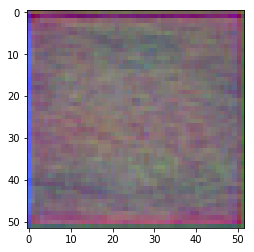

In [48]:
tmp_output = ox[:,:,:,:3]
tmp_reshaped = tmp_output.reshape(tmp_output.shape[1:])

def norm_array(inp):
    onp = 255*(inp-inp.min())/(inp.max()-inp.min())
    onp = onp.round(0).astype(int)
    return onp.copy()


import matplotlib.pyplot as plt
tmp_n = norm_array(tmp_reshaped)
plt.imshow(tmp_n)
plt.show()
#tmp_n.min()

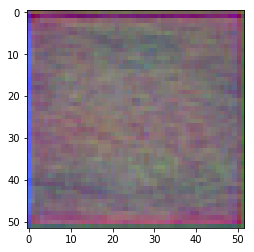

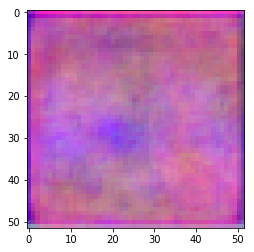

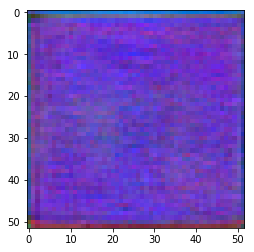

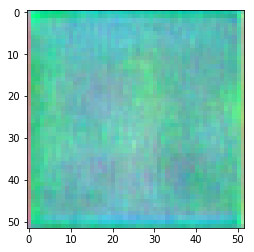

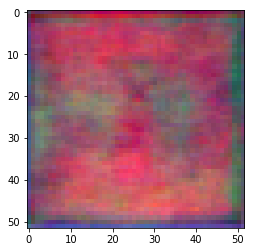

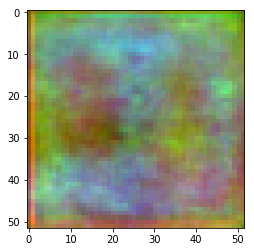

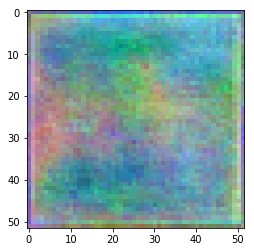

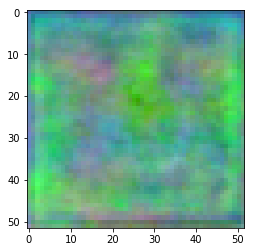

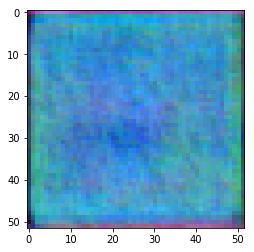

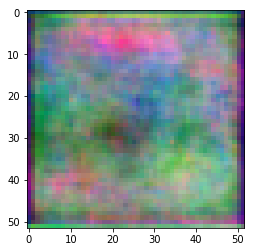

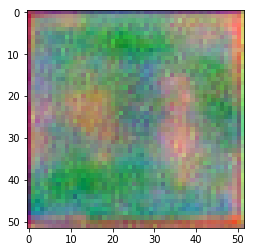

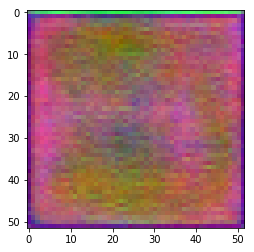

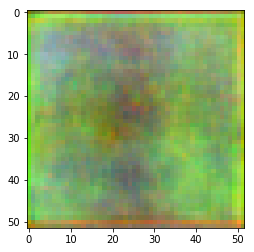

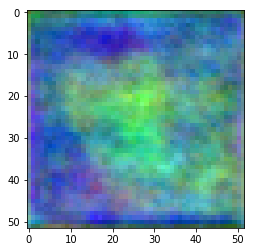

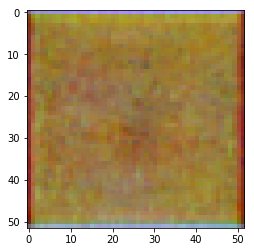

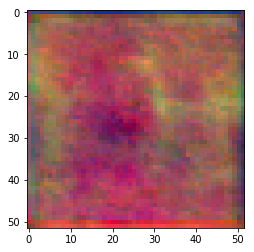

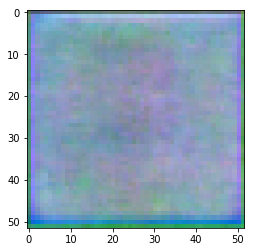

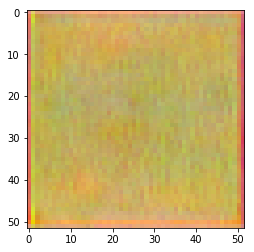

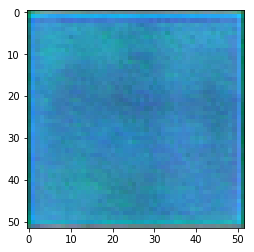

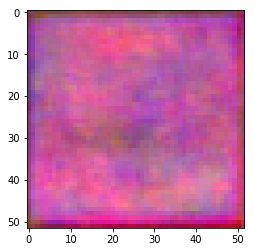

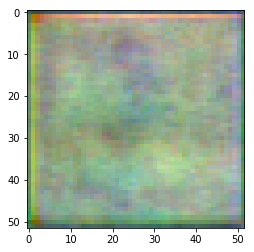

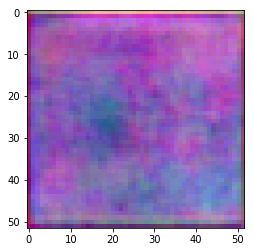

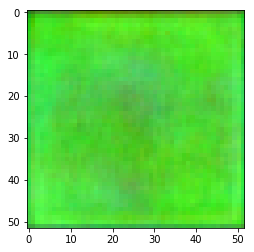

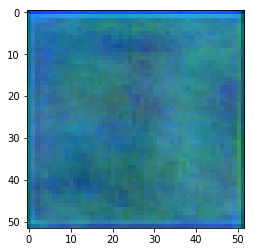

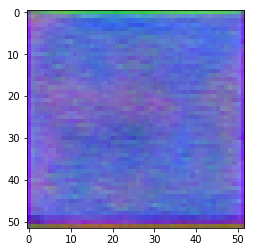

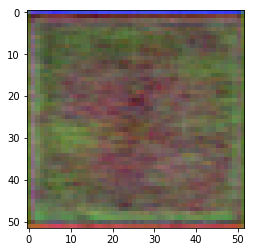

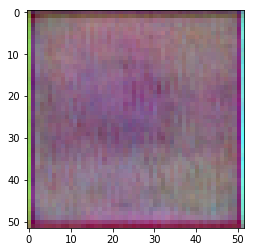

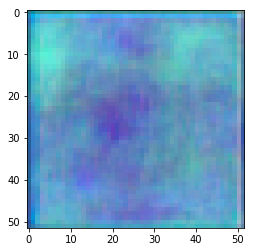

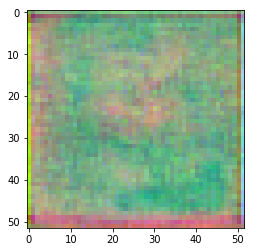

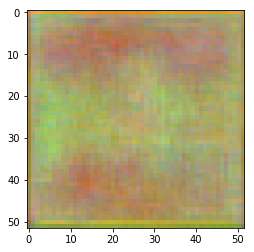

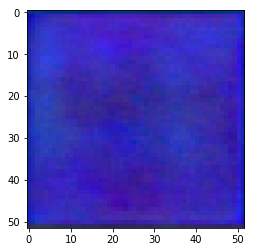

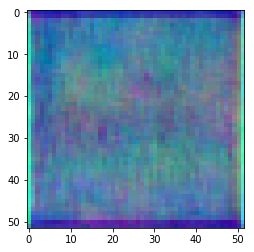

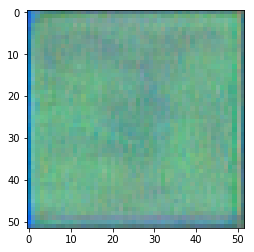

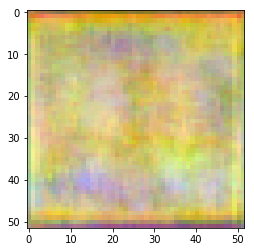

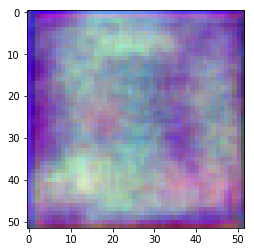

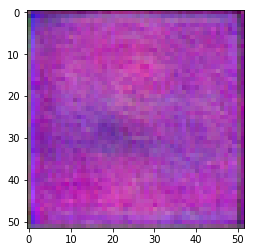

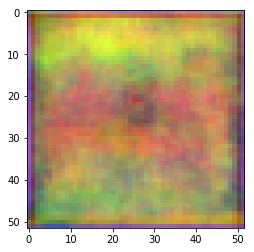

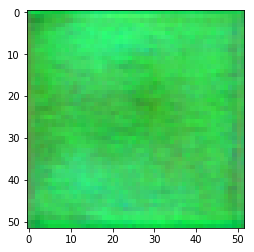

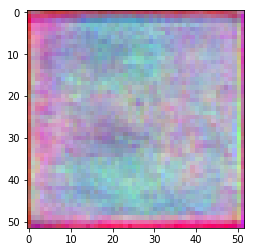

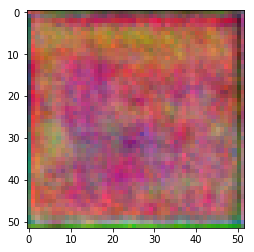

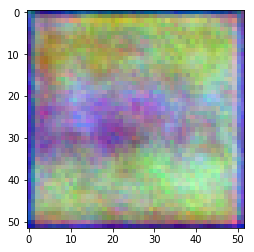

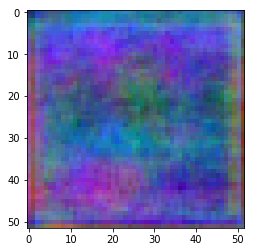

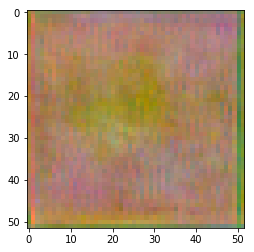

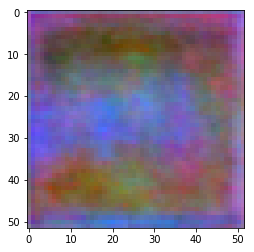

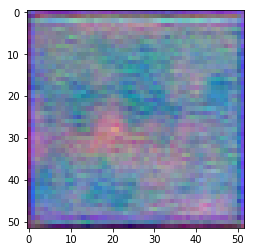

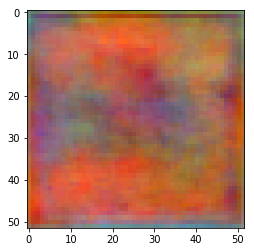

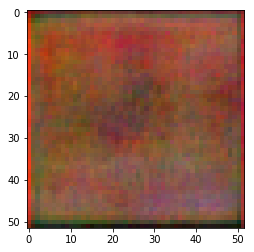

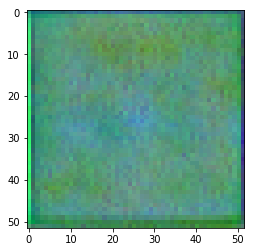

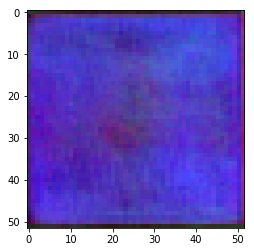

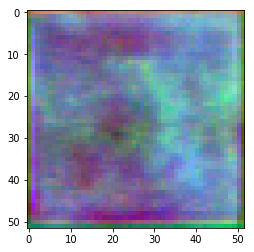

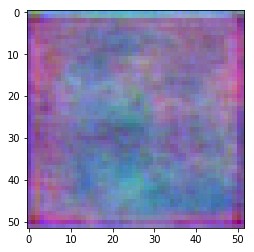

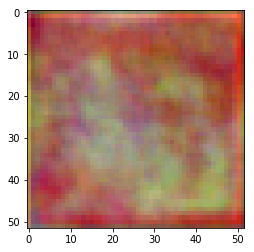

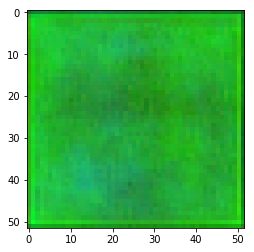

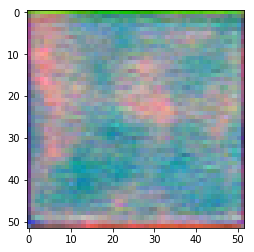

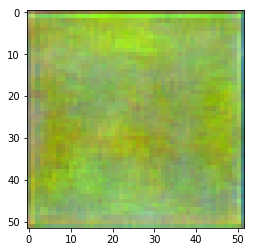

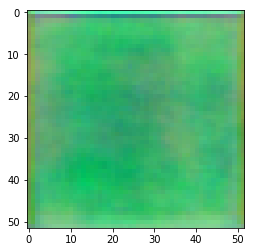

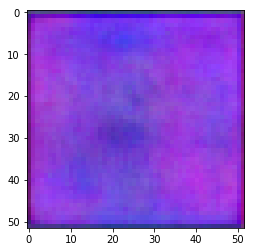

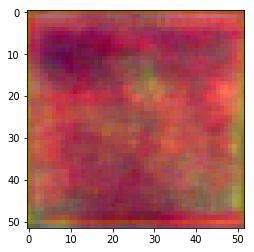

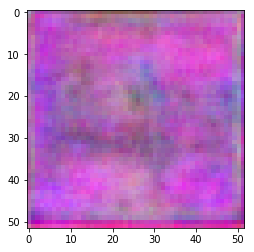

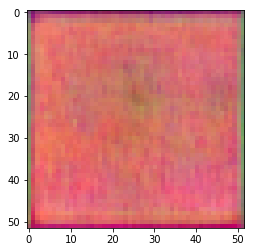

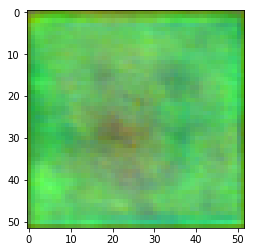

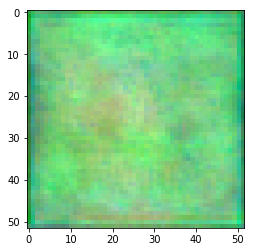

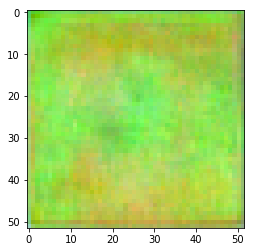

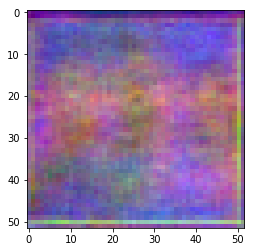

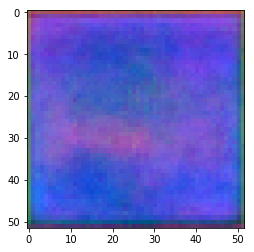

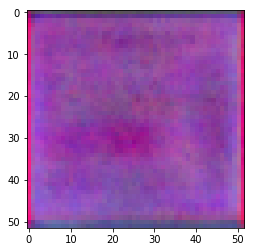

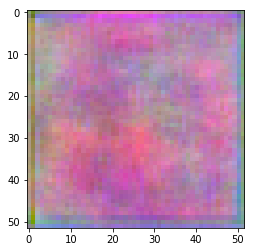

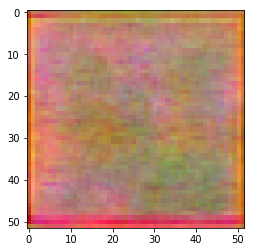

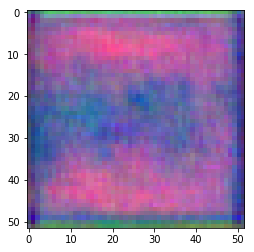

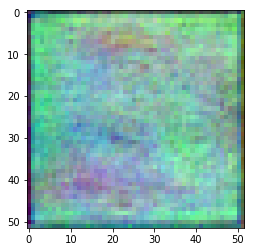

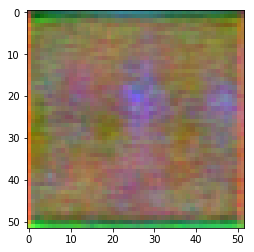

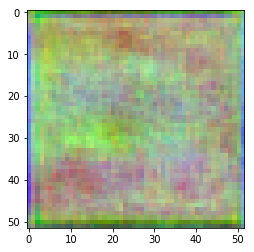

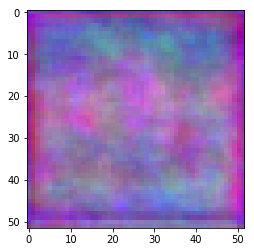

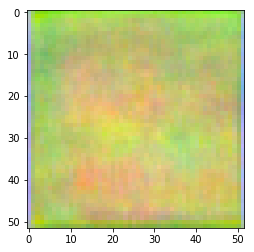

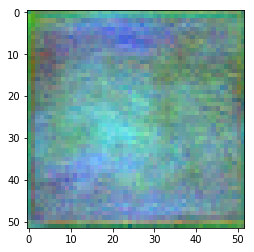

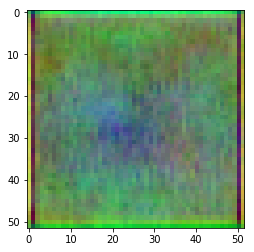

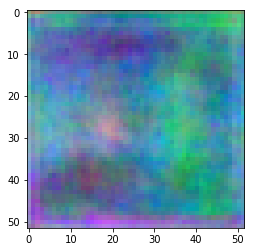

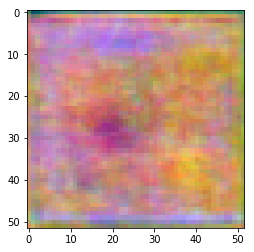

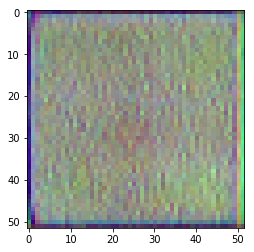

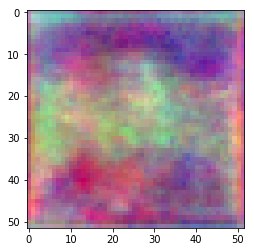

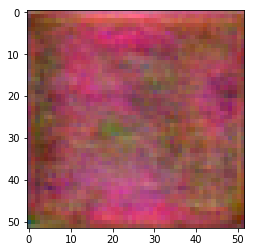

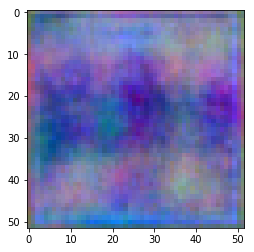

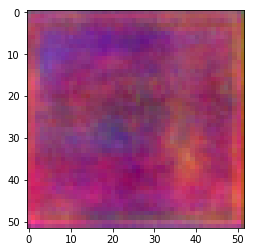

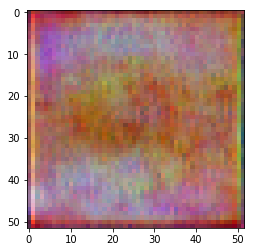

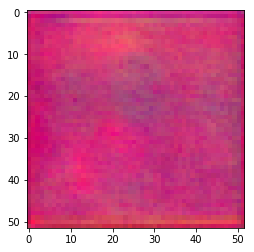

In [50]:
for _ in range(0,255,3):
    tmp_output = ox[:,:,:,_:_+3]
    tmp_reshaped = tmp_output.reshape(tmp_output.shape[1:])
    tmp_n = norm_array(tmp_reshaped)
    plt.imshow(tmp_n)
    plt.show()
#tmp_n.min()